In [1]:
# Step 1: Data Cleaning and Saving Final Dataset
import pandas as pd

# Read the raw data
data = pd.read_csv("austin_final.csv")

# Drop unnecessary columns
columns_to_drop = ['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Replace trace values ('T') and missing values ('-') with 0.0
data = data.replace('T', 0.0)
data = data.replace('-', 0.0)

# Save cleaned data to a new CSV file
data.to_csv('austin_final.csv', index=False)

c:\Users\SANSKAR LOHANI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precipitation in inches for the input is: 1.004519723040985
The precipitation trend graph:


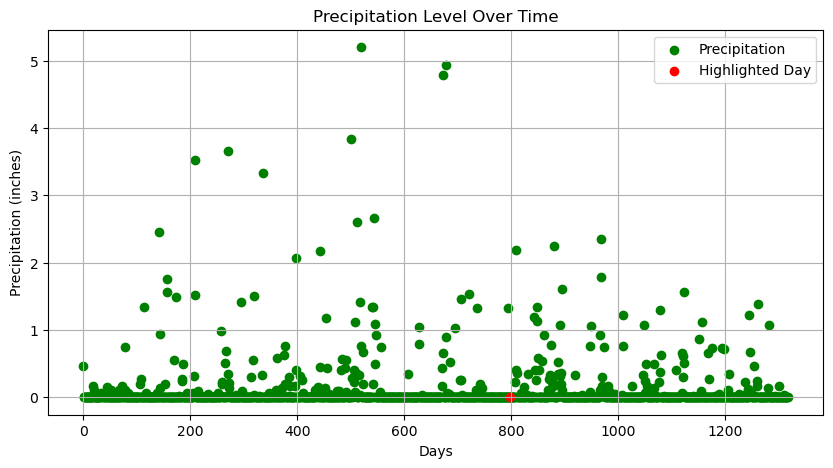

Precipitation Vs Selected Attributes Graph:


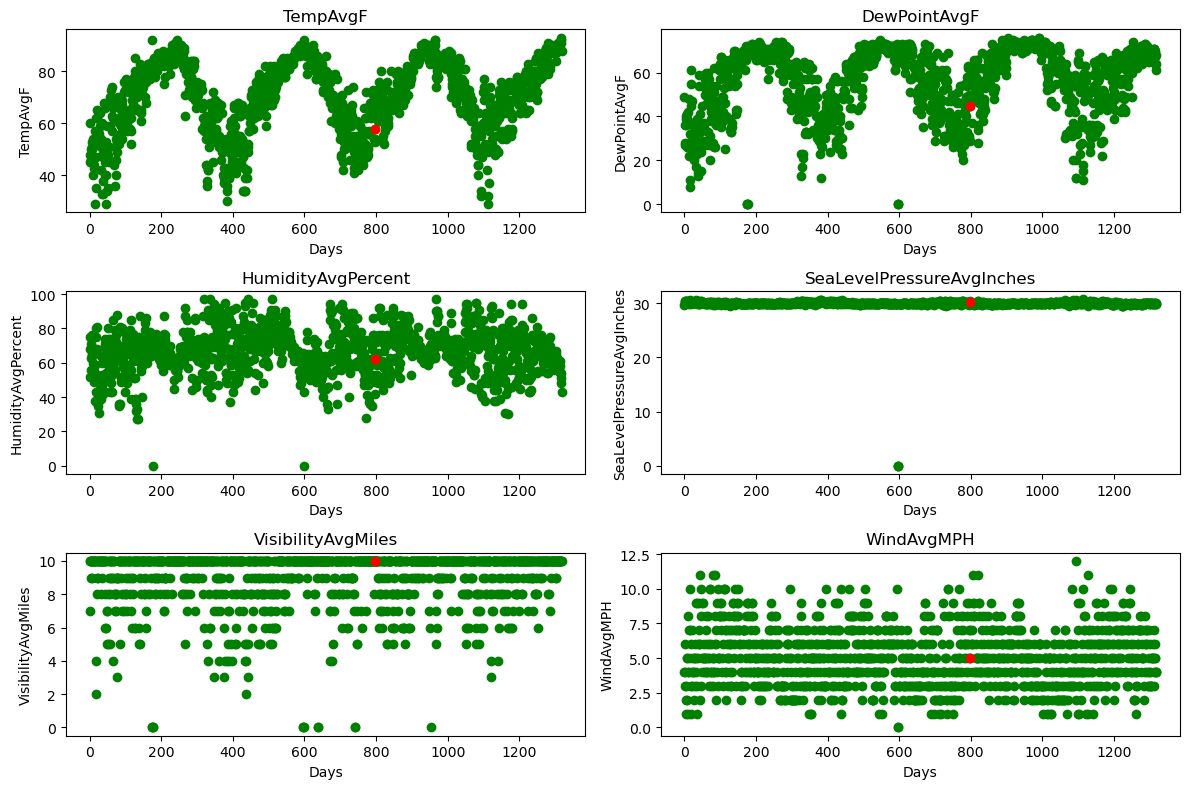

In [2]:
# Step 2: Linear Regression Model and Visualization
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the cleaned data
data = pd.read_csv("austin_final.csv")

# Separate input (X) and output (Y)
X = data.drop(['PrecipitationSumInches'], axis=1).astype(float)
Y = data['PrecipitationSumInches'].astype(float).values.reshape(-1, 1)

# Create list of days
days = [i for i in range(len(Y))]
day_index = 798  # Index of the day to highlight in the plot

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Define a sample input for prediction (must match number of features in X)
inp = np.array([[74, 60, 45, 67, 49, 43, 33, 45, 57, 29.68, 10, 7, 2, 20, 4, 31]])  # 16 values



# Predict and print the precipitation
predicted = model.predict(inp)
print('The precipitation in inches for the input is:', predicted[0][0])

# Plot precipitation trend
print('The precipitation trend graph:')
plt.figure(figsize=(10, 5))
plt.scatter(days, Y, color='green', label='Precipitation')
plt.scatter(day_index, Y[day_index], color='red', label='Highlighted Day')
plt.title('Precipitation Level Over Time')
plt.xlabel('Days')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.grid(True)
plt.show()

# Plot precipitation vs selected attributes
x_f = X[['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
         'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
         'WindAvgMPH']]

print('Precipitation Vs Selected Attributes Graph:')
plt.figure(figsize=(12, 8))
for i in range(x_f.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f.iloc[:, i], color='green')
    plt.scatter(day_index, x_f.iloc[day_index, i], color='red')
    plt.title(x_f.columns[i])
    plt.xlabel('Days')
    plt.ylabel(x_f.columns[i])
plt.tight_layout()
plt.show()